# **Musk Classification**

## **Overview:**
1. Introduction to Problem Statement.
2. Importing required libraries and dataset
3. Varaible Identification and typecasting if necessary.
4. Feature Engineering and Preprocessing
        4.1 Handling categorical features.
        4.2 Normalizing the dataset
        4.3 .Splitting the dataset into train and test.
5. Model Building
6. Model Prediction on test dataset.
7. Model Evaluation.
8. Visualization : Training and validation Graphs


## **1. Introduction to Problem Statement**

The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. <br>
Your task is to build a classification model on the given data using any Deep Learning approach that you deem appropriate viz. Multi-Layer Perceptron, CNN, RNN, etc. or you could also use transfer learning approaches through selection of appropriate pre-trained model. <br>
* The data has to be split in a 80:20 ratio for training and validation datasets.
* You can perform whatever preprocessing and post-processing operations on the data that may help you improve the performance of your model.
* You are required to report the performance measures of the model viz. Accuracy( Training and Validation) and Loss(Training and Validation) graphs, F1 score, precision, recall, etc. along with a well detailed report of what models, pre-processing, post-processing approaches you have used and why you chose to use these approaches.

In [216]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2. Importing required libraries and dataset**

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Credicxo Project/musk.csv')
data.head()


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


## **3. Variable Identification and typecasting if necessary.**

In [218]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [220]:
data.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [221]:
data.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

### Checking whether the given data is balanced or not.

In [222]:
# Checking whether the given data is balanced or not.
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [223]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [224]:
data.describe(exclude = 'int')

,molecule_name,conformation_name
count,6598,6598
unique,102,6598
top,NON-MUSK-j146,jp10_1+5
freq,1044,1


### **Observations:**
* This confirms that our dataset is successfully loaded.
* The dataset consists of 6598 training records and 170 features(including target variables)
* Out of 170 features there are only 2 object type features and rest are numeric type.
* Since the 'class' feature is a target variable, therefore it must be a categorical feauture. So convert that into categorical type for analysis work.
* The dataset is not balanced.
* There are total 102 unique molecule names in the dataset.

### **Inferences**
* Convert the data type of 'class' feature into object type because it is categorical feature.
* Since the dataset is not balanced, make it balanced using sampling techniques during preprocessing.


### **Checking for missing Values present in the dataset.**


In [225]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [226]:
data.isnull().any().sum()

0

### **Observation:**
* Now it confirms that our dataset does not contains any missing values.

In [227]:
data['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-295        2
MUSK-300            2
NON-MUSK-j130       2
NON-MUSK-j96        1
NON-MUSK-j97        1
Name: molecule_name, Length: 102, dtype: int64

In [228]:
data['conformation_name'].value_counts()


jp10_1+5      1
207_1+31      1
228_2+1       1
j147_4+5      1
216_1+65      1
             ..
287_1+7       1
192_1+284     1
j146_1+196    1
j147_2+189    1
j146_1+116    1
Name: conformation_name, Length: 6598, dtype: int64

### **Inferences**
* Since there are only 102 unique molecule names. So this feature must have to handle during preprocessing by applying some encoding technique.
* Conformation name is a unique feautre and can be used a primary key because it has different values for all 6598 training records.

In [229]:
data.shape

(6598, 170)

## **4. Feature Engineering and Preprocessing**

## **4.1 Handling Categorical Feature.**
### **Categorical features** present in our dataset are
1. ID
2. Molecule Name
3. Conformation Name.
Now in this section we have to handle these features in order to build model for prediction.<br>
* During varaible identification and typecasting section we have observed that ID and conformation name has all unique values. So we can delete the ID column and set primary key as Conformation name

* Molecule name has 102 unique values. Therefore this caegorical feature can be used to generate some new feature by using encoding techniques.
1. Applying frequency encoding.
2. Applying target encoding.

Now lets start handle these features.

In [230]:
# Frequency Encoding
def frequency_encoding(data,cat):
  freq_enc = data.groupby(cat).size()/len(data)
  return  data[cat].map(freq_enc)


In [231]:
# Target encoding
def mean_encoding(data,tar,cat):
  data[tar] = data[tar].astype('int')
  mean_enc = data.groupby(cat)[tar].mean()
  return data[cat].map(mean_enc)

In [232]:
# Generating new feautures from molecule_name feature by using frequency encoding and mean_encoding techniques
data['molecule_name_freq'] = frequency_encoding(data, 'molecule_name')
data['molecule_name_mean_enc'] = mean_encoding(data,'class','molecule_name')

In [233]:
data['molecule_name_mean_enc'].value_counts()

0    5581
1    1017
Name: molecule_name_mean_enc, dtype: int64

In [234]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

Text(0.5, 1.0, 'nunique: 2\n Value Count:\n 0    5581\n1    1017\nName: molecule_name_mean_enc, dtype: int64')

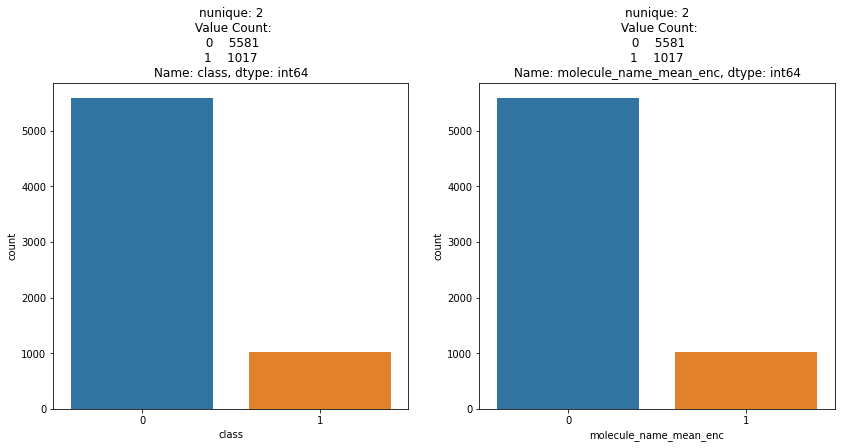

In [235]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x= 'class', data= data)
plt.title('nunique: {}\n Value Count:\n {}'.format(data['class'].nunique(),
                                                 data['class'].value_counts()))

plt.subplot(1,2,2)
sns.countplot(x= 'molecule_name_mean_enc', data= data)
plt.title('nunique: {}\n Value Count:\n {}'.format(data['molecule_name_mean_enc'].nunique(),
                                                 data['molecule_name_mean_enc'].value_counts()))

Observation: 
* If we closely observe both figures than it shows the count of both same. It means there is some relation ship between molecule name and the class.<br>
The relationship is that if the molecule_name starts with 'NON' the class is 0 else 1.

## **4.2 Scaling and Normalizing the dataset**
In this section we will noramlize the dataset because this will help our gradient descent to converge fast otherwise it will take much more time or may not converge optimally due to the varying range of data.

In [236]:
corr_matrix = data.corr().abs()

# upper triangle of correlation matrix
upper_traingle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.93
drop = [column for column in upper_traingle.columns if any(upper_traingle[column] > 0.92)]

In [237]:
df = data.drop(columns = drop)
df.shape

(6598, 118)

In [238]:
def normlize(data):
    for col in data.columns[3:172]:
        data[col] = (data[col]/max(data[col]))
    return data

df = normlize(df)
df.head()


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f16,f17,f18,f19,f20,f21,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f35,f36,f37,f38,f39,f40,...,f97,f102,f106,f107,f108,f116,f120,f122,f124,f125,f126,f129,f131,f132,f133,f134,f136,f137,f138,f140,f145,f146,f147,f148,f151,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class,molecule_name_freq
0,1,MUSK-211,211_1+1,0.157534,-1.136842,-0.740741,-0.428571,-0.36,0.245,0.172727,-0.503125,-0.054422,0.021645,-1.835227,-1.195652,-0.579487,-1.892405,-3.8375,-0.224638,-0.560847,-1.008889,-0.185022,-0.304124,-0.314554,0.596215,0.292419,0.092896,-0.164634,-0.613793,-0.385057,0.394737,-0.375405,0.400000,-0.512077,-0.545455,0.194444,-1.122449,0.213904,-0.252336,0.350515,...,-0.321212,0.425287,-1.084906,-1.044025,-0.209581,-0.019763,-0.256579,0.279070,-0.471366,0.267559,0.081169,-0.553398,0.160142,-0.462745,-0.426136,-1.076923,-0.152,0.064516,-0.100000,-0.586207,-0.830986,-0.386973,-0.674419,-0.107692,-0.331967,-0.366667,0.337731,0.019608,-1.682759,-3.276596,0.290503,-0.036458,0.094891,0.354930,0.2496,-0.169492,-0.666667,0.261580,1.0,0.018199
1,2,MUSK-211,211_1+10,0.140411,-1.978947,-1.790123,0.136646,-0.36,-0.030,0.259091,-0.534375,-0.265306,-0.432900,-1.812500,-0.603261,-1.169231,-1.778481,-3.7500,0.391304,-0.788360,-0.435556,-0.863436,-0.139175,0.009390,0.236593,0.176895,-0.185792,0.274390,-0.627586,0.183908,0.357143,-0.375405,0.274194,-0.111111,-0.263636,0.188272,-1.163265,0.010695,-1.345794,0.195876,...,-0.260606,0.393678,-1.235849,-1.037736,-0.700599,0.193676,0.144737,0.507752,-0.339207,-0.033445,-0.055195,-0.101942,0.113879,-0.501961,-0.409091,-0.733728,-0.752,0.284946,-0.607692,-0.172414,-0.830986,-0.390805,-0.703488,-0.507692,-0.168033,-0.525000,0.303430,-0.032680,-1.620690,-0.627660,-0.011173,0.270833,0.250608,0.383099,0.2704,-0.206780,-0.809524,0.215259,1.0,0.018199
2,3,MUSK-211,211_1+11,0.157534,-2.042105,-1.790123,0.173913,-0.36,0.365,0.259091,-0.525000,-0.265306,-0.095238,-1.812500,-0.603261,-0.533333,-1.791139,-3.7875,0.376812,-0.804233,-0.431111,-0.991189,-0.144330,0.009390,0.564669,0.176895,-0.180328,0.280488,-0.606897,0.126437,0.296992,-0.375405,0.061290,-0.053140,-0.172727,0.219136,-1.190476,0.016043,-1.205607,0.190722,...,-0.060606,0.350575,-1.250000,-1.056604,-0.712575,0.047431,0.157895,0.472868,-0.158590,-0.431438,0.061688,0.000000,-0.053381,-0.505882,-0.420455,-0.739645,-0.744,0.284946,-0.553846,-0.162562,-0.830986,-0.390805,-0.691860,-0.507692,-0.168033,-1.166667,0.203166,-1.065359,-1.641379,-1.425532,-0.860335,0.296875,0.347932,0.400000,0.2640,-0.227119,-0.863095,0.106267,1.0,0.018199
3,4,MUSK-211,211_1+12,0.140411,-1.978947,-1.790123,0.136646,-0.36,-0.035,0.259091,-0.531250,-0.265306,-0.428571,-1.812500,-0.603261,-1.169231,-1.784810,-3.7625,0.391304,-0.793651,-0.435556,-0.863436,-0.144330,0.009390,0.242902,0.173285,-0.185792,0.280488,-0.627586,0.183908,0.353383,-0.375405,0.270968,-0.111111,-0.263636,0.191358,-1.163265,0.016043,-1.345794,0.195876,...,-0.266667,0.393678,-1.240566,-1.044025,-0.706587,0.197628,0.151316,0.507752,-0.343612,-0.040134,-0.058442,-0.097087,0.113879,-0.501961,-0.414773,-0.739645,-0.744,0.284946,-0.600000,-0.167488,-0.830986,-0.386973,-0.703488,-0.500000,-0.168033,-0.550000,0.303430,-0.045752,-1.627586,-0.638298,-0.022346,0.270833,0.253041,0.383099,0.2688,-0.203390,-0.803571,0.217984,1.0,0.018199
4,5,MUSK-211,211_1+13,0.140411,-1.978947,-1.790123,0.136646,-0.36,-0.035,0.259091,-0.531250,-0.265306,-0.428571,-1.812500,-0.603261,-1.169231,-1.784810,-3.7625,0.391304,-0.793651,-0.435556,-0.863436,-0.144330,0.009390,0.246057,0.173285,-0.185792,0.280488,-0.627586,0.178161,0.353383,-0.375405,0.270968,-0.111111,-0.263636,0.191358,-1.163265,0.016043,-1.345794,0.195876,...,-0.266667,0.393678,-1.240566,-1.044025,-0.706587,0.197628,0.151316,0.507752,-0.343612,-0.040134,-0.058442,-0.097087,0.113879,-0.501961,-0.414773,-0.739645,-0.744,0.284946,-0.600000,-0.167488,-0.830986,-0.386973,-0.703488,-0.500000,-0.168033

## **4.3 Splitting the dataset into train and test dataset.**
In this section we are goiing to split the dataset into train and test dataset and setting the test size as 20%.

* But before that first drop the row 'ID' and molecule_name and set index as conformation_name.

In [239]:
# Set index as molecule_name and conformation name
df.drop(columns = ['ID','molecule_name'], axis = 1, inplace = True)
df.set_index(['conformation_name'],inplace = True)

In [240]:
X = df.drop('class', axis = 1).to_numpy()
Y = df[df.columns[-1]].to_numpy()
print(X.shape,Y.shape)

(6598, 114) (6598,)


In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.20, random_state = 67)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5278, 114) (1320, 114) (5278,) (1320,)


In [242]:
X_train = np.reshape(X_train,(X_train.shape[0],19,6,1)).astype('float32')
X_test= np.reshape(X_test,(X_test.shape[0],19,6,1)).astype('float32')
print(X_train.shape,X_test.shape)

(5278, 19, 6, 1) (1320, 19, 6, 1)


In [243]:
import keras
y_train = keras.utils.to_categorical(y_train,num_classes = 2)
y_test = keras.utils.to_categorical(y_test,num_classes = 2)
print(y_train.shape,y_test.shape)

(5278, 2) (1320, 2)


## **5. Model Building: Convolutional Neural Network**
In this section we are going to build a CNN model using different different techniques like different activations, MaxPooling, Dropout, Flatten, Adam Optimization.


In [244]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D

model=Sequential()
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(Conv2D(32,(2,2),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [245]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 18, 5, 64)         320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 17, 4, 64)         16448     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 3, 64)         16448     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 2, 32)         8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 1, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 224)              

## Observation: 
* Here we have define our model by applying different techniques. And now we have total 70,498 parameters to train.

* Now our next move is to fit our model on training dataset, and we will validate our model using test dataset.

<br>
Since I have run this model using different different batch sizes and epoches, I found better accuracy on batch_size = 150 and epochs = around 50.

In [246]:
history = model.fit(X_train, y_train, batch_size=150, epochs=50 , validation_data=(X_test, y_test))

Epoch 1/50
36/36 [==============================] - 3s 70ms/step - loss: 0.4728 - accuracy: 0.8236 - val_loss: 0.4086 - val_accuracy: 0.8470
Epoch 2/50
36/36 [==============================] - 2s 67ms/step - loss: 0.4058 - accuracy: 0.8405 - val_loss: 0.3922 - val_accuracy: 0.8470
Epoch 3/50
36/36 [==============================] - 2s 66ms/step - loss: 0.3654 - accuracy: 0.8405 - val_loss: 0.3148 - val_accuracy: 0.8470
Epoch 4/50
36/36 [==============================] - 2s 67ms/step - loss: 0.2986 - accuracy: 0.8524 - val_loss: 0.2240 - val_accuracy: 0.9235
Epoch 5/50
36/36 [==============================] - 2s 67ms/step - loss: 0.1956 - accuracy: 0.9142 - val_loss: 0.1021 - val_accuracy: 0.9856
Epoch 6/50
36/36 [==============================] - 2s 67ms/step - loss: 0.0951 - accuracy: 0.9714 - val_loss: 0.0444 - val_accuracy: 0.9894
Epoch 7/50
36/36 [==============================] - 2s 67ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0276 - val_accuracy: 0.9917
Epoch 8/50
36

In [247]:
score=model.evaluate(X_test,y_test,verbose=0)
print(score)

[0.0016822442412376404, 0.9992424249649048]


## **6. Model Prediction**
In this section we are going to make prediction on the model.

In [248]:
y_pred = model.predict(X_test)
y_pred.shape


(1320, 2)

In [211]:
def preprocess(m):
    a = np.zeros((1320))
    for i in range(1320):
        if m[i][0]>m[i][1]:
            a[i] = 1
        else:
            a[i] = 0
    return a
y_predict = preprocess(y_pred)
y_predict

array([1., 1., 1., ..., 1., 1., 1.])

In [212]:
y_test = preprocess(y_test)
print(test.shape,y_predict.shape)

(1320,) (1320,)


## **7. Model evaluation on test Dataset**

In [214]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
acc_score = accuracy_score(y_predict, y_test)
prec_score = precision_score(y_predict, y_test)
rec_score = recall_score(y_predict, y_test)
f_score = f1_score(y_predict, y_test)
cls_report = classification_report(y_predict,y_test)

print("Accuracy:",acc_score)
print("f1_score:",f_score)
print("Recall:",rec_score)
print("Precision:",prec_score)
print("Classification Report:",cls_report)


print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])


Accuracy: 0.9992424242424243
f1_score: 0.9995525727069351
Recall: 1.0
Precision: 0.9991055456171736
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       203
         1.0       1.00      1.00      1.00      1117

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

Validation Loss: 0.0031390718650072813
Validation Accuracy: 0.9984848499298096


### **Observation:**
* We achieve a accuracy, recall, precision,f1_ score of more than 99%. And hence it concludes that we have good generalized model which predict the class almost 100% correct.


## **8. Visualization**
In this section we are going to visualize the model's accuracy and loss on train and test dataset with respect to epoches and number of iterations.


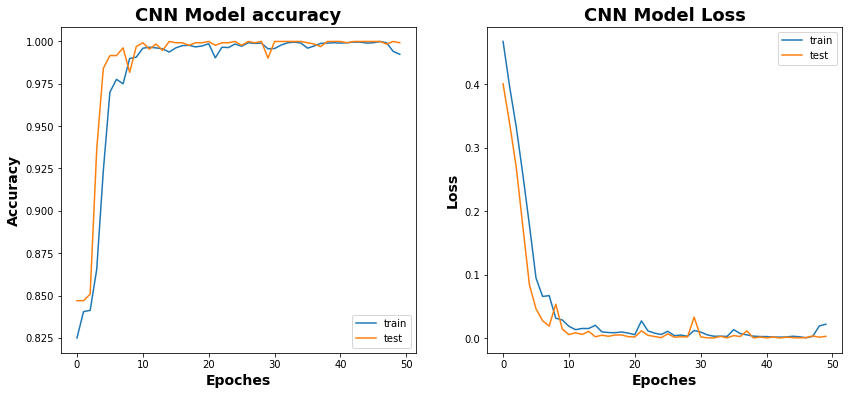

In [215]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy', fontsize = 18, fontweight = 'bold')
plt.ylabel('Accuracy',fontsize = 14, fontweight = 'bold')
plt.xlabel("Epoches",fontsize = 14, fontweight = 'bold')
plt.legend(['train', 'test'])


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss',fontsize = 18, fontweight = 'bold')
plt.ylabel('Loss',fontsize = 14, fontweight = 'bold')
plt.xlabel('Epoches',fontsize = 14, fontweight = 'bold')
plt.legend(['train', 'test'])
plt.show()

# **Thank You!**